# Homework 4

The goal of homework 4 is to become faimiliar with SHapley Additive exPlanations (SHAP). For this task, I have reused the *churn* dataset from previous homeworks. The model of interest is the random forest classifier from the *XGBoost* package.

# Task 1, 2, 3

We begin with choosing two observations from the test set for which we obtain model's predictions. Although the observatiosn are chosen randomly, their predictions seem to be very close. To see the decision-making process standing behind those predictions and whether it differs between them, we begin with calculating SHAP values using *dalex*, and then repeat it using the *shap* package.

In [23]:
probs = model_rf.predict_proba(x_s)[:, 1]
[print(f'Predicted probability for observation {i}: {e}') \
 for i, e in zip(range(2), probs)]
print('')

Predicted probability for observation 0: 0.08536858856678009
Predicted probability for observation 1: 0.08841084688901901



The *dalex* implementation indicates that in both cases the *total_day_minutes* feature has the highest attribution value. This is consistent with the explanations obtained in the previous homework and makes intuitive sense. Such feature should greatly indicate whether the client is going to churn or not. Interestingly, other features seem to differ in terms of attributiosn between observations. For example, the *total_night_minutes* feature has the second highest absolute attribution for the second observation, and only second from last for the first observation. Moreover, *total_eve_minutes* has negative attribution for the first observation and positive for the second one.

In [30]:
make_shap_dalex()

Preparation of a new explainer is initiated

  -> data              : 4000 rows 8 cols
  -> target variable   : Parameter 'y' was a pandas.Series. Converted to a numpy.ndarray.
  -> target variable   : 4000 values
  -> model_class       : xgboost.sklearn.XGBRFClassifier (default)
  -> label             : RF
  -> predict function  : <function make_shap_dalex.<locals>.<lambda> at 0x28a2ca290> will be used
  -> predict function  : Accepts pandas.DataFrame and numpy.ndarray.
  -> predicted values  : min = 0.0, mean = 0.072, max = 1.0
  -> model type        : classification will be used (default)
  -> residual function : difference between y and yhat (default)
  -> residuals         : min = -1.0, mean = 0.0695, max = 1.0
  -> model_info        : package xgboost

A new explainer has been created!


Interestingly, the *shap* implementation, while still assigning the highest absolute attribution to *total_day_minutes*, differs in terms of other features. Interestingly, for the first observation, *total_eve_minutes* is only the fourth feature in terms of absolute attribution, and for the second observation the *total_intl_minutes* feature seems to have a much higher importance.

/Users/bartlomiejsobieski/miniforge3/envs/mimuw_xai/lib/python3.10/site-packages/xgboost/core.py:160: UserWarning:

[22:01:26] WARNING: /Users/runner/work/xgboost/xgboost/src/c_api/c_api.cc:1240: Saving into deprecated binary model format, please consider using `json` or `ubj`. Model format will default to JSON in XGBoost 2.2 if not specified.



Observation: 0


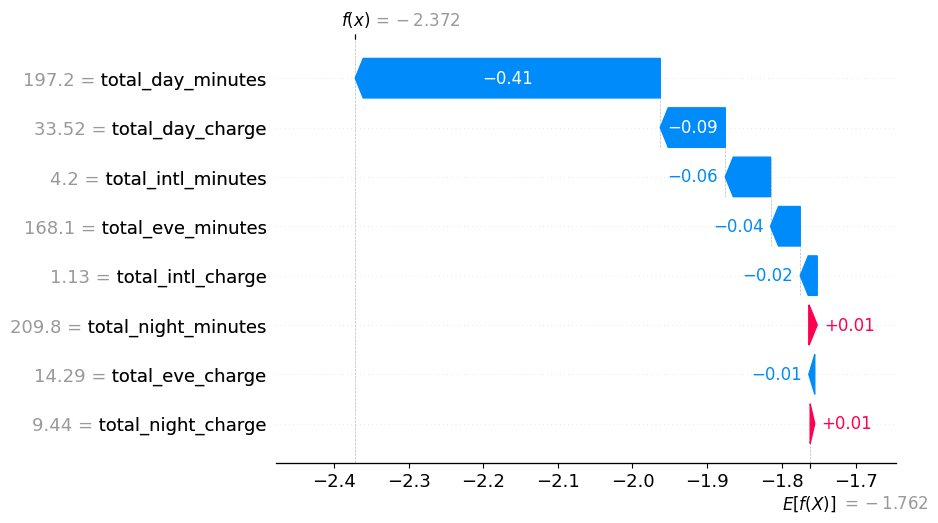

Observation: 1


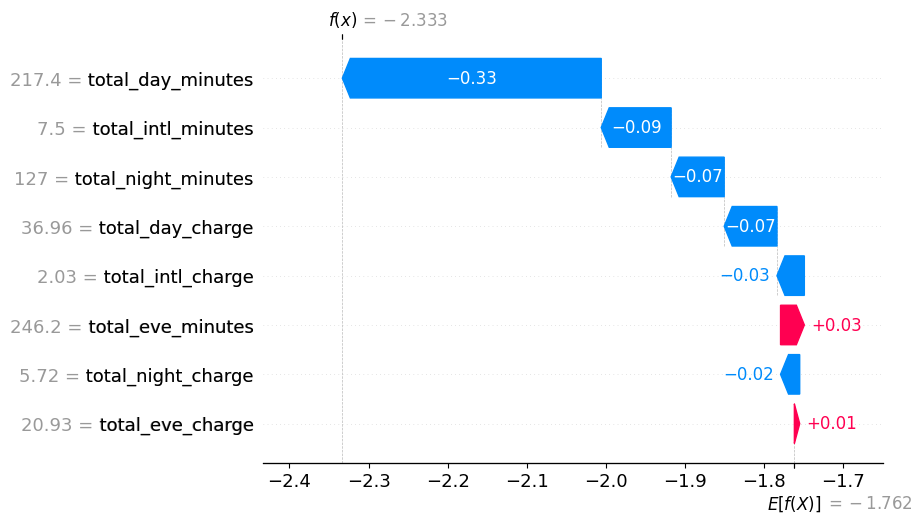

In [ ]:
make_shap_shap()

While preserving most of the ordering, the *shap* implementation still seems to differ from the *dalex* implementation.

# Task 4, 5

We proceed with the *dalex* implementation and find two observations for which different features are the most important. We limit to only the top feature as manual search indicated no examples where the top two features differ simultaenously. For the chosen observations, the predicted probability of churning differs by 0.08, but still remains low. For the first observation, the *total_day_minutes* still seems to have the highest importance. However, for the second observation, *total_eve_minutes* dominates other features in terms of absolute attribution. Interestingly, *total_day_minutes* has a positive attribution for the second observation, which seemed to be very rare across many searched observations. Therefore, there is a clear indication of different 'reasoning' standing behind an increased probability for the second observation.

In [36]:
make_plot_tasks_4_5()

Probability for observation 1: 0.10076433420181274
Probability for observation 2: 0.18861456215381622
Preparation of a new explainer is initiated

  -> data              : 4000 rows 8 cols
  -> target variable   : Parameter 'y' was a pandas.Series. Converted to a numpy.ndarray.
  -> target variable   : 4000 values
  -> model_class       : xgboost.sklearn.XGBRFClassifier (default)
  -> label             : RF
  -> predict function  : <function make_plot_tasks_4_5.<locals>.<lambda> at 0x28a2ca9e0> will be used
  -> predict function  : Accepts pandas.DataFrame and numpy.ndarray.
  -> predicted values  : min = 0.0, mean = 0.072, max = 1.0
  -> model type        : classification will be used (default)
  -> residual function : difference between y and yhat (default)
  -> residuals         : min = -1.0, mean = 0.0695, max = 1.0
  -> model_info        : package xgboost

A new explainer has been created!


# Task 7

To see how variable attributions differ between different models, we train a simple MLP using *scikit-learn* and calculate variable attributions using the *dalex* implementation. We analyze the observations from the previous task. Interestingly, MLP assigns a similar but lower probability to the first observation, and a much higher probability to the second one. While the ordering of these probabilities remains the same, variable attributions indicate a totally different decision-making process. For both cases, *total_day_charge* is the most important feature. While *total_day_minutes* is the second most important feature for the first observation, its attribution is positive - contrary to the random forest model. It it also positive for the second observation, although seems to be of much lower importance. In general, the explanations indicate that these models greatly differ in how they perform a decision.

In [38]:
make_plot_task_7()

Probability for observation 1: 0.08895326872084033
Probability for observation 2: 0.31728696521103766
Preparation of a new explainer is initiated

  -> data              : 4000 rows 8 cols
  -> target variable   : Parameter 'y' was a pandas.Series. Converted to a numpy.ndarray.
  -> target variable   : 4000 values
  -> model_class       : sklearn.neural_network._multilayer_perceptron.MLPClassifier (default)
  -> label             : RF
  -> predict function  : <function make_plot_task_7.<locals>.<lambda> at 0x28ba5ea70> will be used
  -> predict function  : Accepts pandas.DataFrame and numpy.ndarray.
  -> predicted values  : min = 0.00876, mean = 0.136, max = 0.99
  -> model type        : classification will be used (default)
  -> residual function : difference between y and yhat (default)
  -> residuals         : min = -0.94, mean = 0.00507, max = 0.982
  -> model_info        : package sklearn

A new explainer has been created!


/Users/bartlomiejsobieski/miniforge3/envs/mimuw_xai/lib/python3.10/site-packages/sklearn/base.py:465: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names



# Task B

In Task B, our goal is to calculate Shapley values for player A given the following value function:

v() = 0  
v(A) = 20  
v(B) = 20  
v(C) = 60  
v(A,B) = 60  
v(A,C) = 70  
v(B,C) = 70  
v(A,B,C) = 100  

We begin with constructing the table:

| Prob | Order | A's margina | B's marginal | C's marginal |
|------|-------|-------------|--------------|--------------|
| 1/6  |  ABC  |     20      |       v(A, B) - v(A) = 40       |       v(A, B, C) - v(A, B) = 40       |
| 1/6  |  ACB  |     20      |      v(A, B, C) - v(A, C) = 30        |       v(A, C) - v(A) = 50       |
| 1/6  |  BAC  |     v(A, B) - v(B) = 40        |      20        |       v(A, B, C) - v(A, B) = 40       |
| 1/6  |  BCA  |     v(A, B, C) - v(B, C) = 30        |      20        |      v(B, C) - v(B) = 50        |
| 1/6  |  CAB  |     v(A, C) - v(C) 10       |       v(A, B, C) - v(A, C) = 30       |     60         |
| 1/6  |  CBA  |     v(A, B, C) - v(B, C) = 30     |    v(B, C) - v(C) = 10          |      60      |

Therefore, for player A, we have the following Shapley value:

1/6 * (20 + 20 + 40 + 30 + 10 + 30) = 150/6 = 25

# Appendix

In [2]:
import dalex as dx
import shap
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import roc_auc_score, average_precision_score

In [3]:
PATH_DATASET = 'churn.csv'
DATASET = pd.read_csv(PATH_DATASET, index_col = 0)

In [4]:
SEED = 0

In [5]:
METRICS = {
    'roc_auc': roc_auc_score,
    'pr_auc': average_precision_score}

In [6]:
import xgboost as xgb
MODELS = {
    'random_forest': xgb.XGBRFClassifier(random_state = SEED),
    'mlp': Pipeline([
        ('standard_scaler', StandardScaler()),
        ('mlp', MLPClassifier((32, 32), 'relu', random_state = SEED))])}

In [7]:
def get_train_test_split():
    x, y = DATASET.iloc[:, :-1], DATASET.iloc[:, -1]
    return x.loc[:(len(x) * 0.8) - 1], x.loc[(len(x) * 0.8):], y.loc[:(len(y) * 0.8) - 1], y.loc[(len(y) * 0.8):]

def train_models():
    x_train, x_test, y_train, y_test = get_train_test_split()
    results = {model_name: {} for model_name in MODELS.keys()}
    trained_models = {}
    for model_name, model in MODELS.items():
        model.fit(x_train, y_train)
        trained_models[model_name] = model
        if isinstance(model, xgb.XGBRFClassifier):
            y_pred = model.predict(x_test)
        else:
            y_pred = model.predict_proba(x_test)[:, -1]
        for metric_name, metric in METRICS.items():
            results[model_name][metric_name] = metric(y_test, y_pred)
    print('Finished')
    return trained_models, results

In [8]:
trained_models, test_metrics = train_models()
x_train, x_test, y_train, y_test = get_train_test_split()

Finished


Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.


In [9]:
x_s, y_s = x_test[:2], y_test[:2]
print(y_s)

4000    0
4001    0
Name: TARGET, dtype: int64


In [10]:
model_rf = trained_models['random_forest']
model_rf.predict(x_s)

array([0, 0])

In [17]:
def make_shap_dalex():
    predict_func = lambda m, d: m.predict(d)
    explainer = dx.Explainer(
        model_rf, x_train, y_train, predict_function = predict_func, label = "RF")
    explainer.model_performance()
    shap_attributions = [explainer.predict_parts(
        x_s.iloc[[i]], type = "shap", label=f'Observation {i}') for i in range(2)]
    shap_attributions[0].plot(shap_attributions[1::])

In [18]:
make_shap_dalex()

Preparation of a new explainer is initiated

  -> data              : 4000 rows 8 cols
  -> target variable   : Parameter 'y' was a pandas.Series. Converted to a numpy.ndarray.
  -> target variable   : 4000 values
  -> model_class       : xgboost.sklearn.XGBRFClassifier (default)
  -> label             : RF
  -> predict function  : <function make_shap_dalex.<locals>.<lambda> at 0x28b803d90> will be used
  -> predict function  : Accepts pandas.DataFrame and numpy.ndarray.
  -> predicted values  : min = 0.0, mean = 0.072, max = 1.0
  -> model type        : classification will be used (default)
  -> residual function : difference between y and yhat (default)
  -> residuals         : min = -1.0, mean = 0.0695, max = 1.0
  -> model_info        : package xgboost

A new explainer has been created!


/Users/bartlomiejsobieski/miniforge3/envs/mimuw_xai/lib/python3.10/site-packages/xgboost/core.py:160: UserWarning:

[08:01:50] WARNING: /Users/runner/work/xgboost/xgboost/src/c_api/c_api.cc:1240: Saving into deprecated binary model format, please consider using `json` or `ubj`. Model format will default to JSON in XGBoost 2.2 if not specified.



Observation: 0


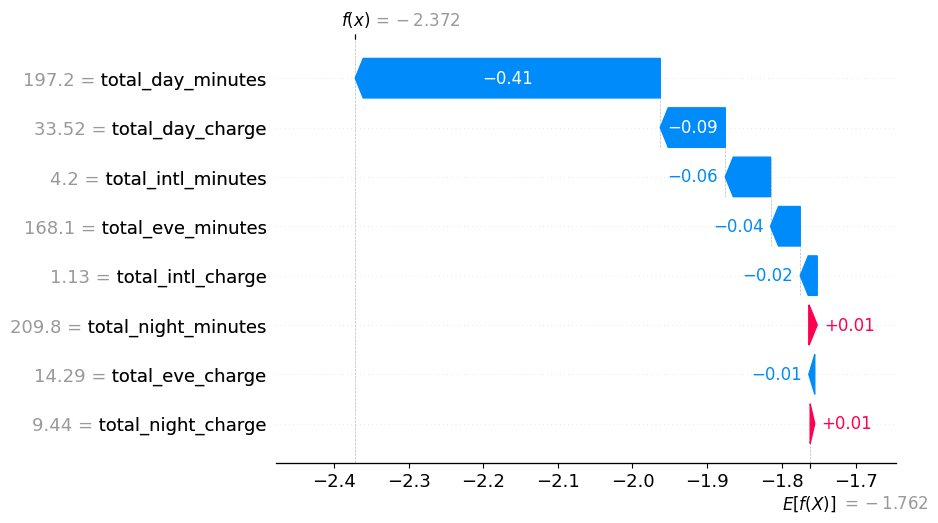

Observation: 1


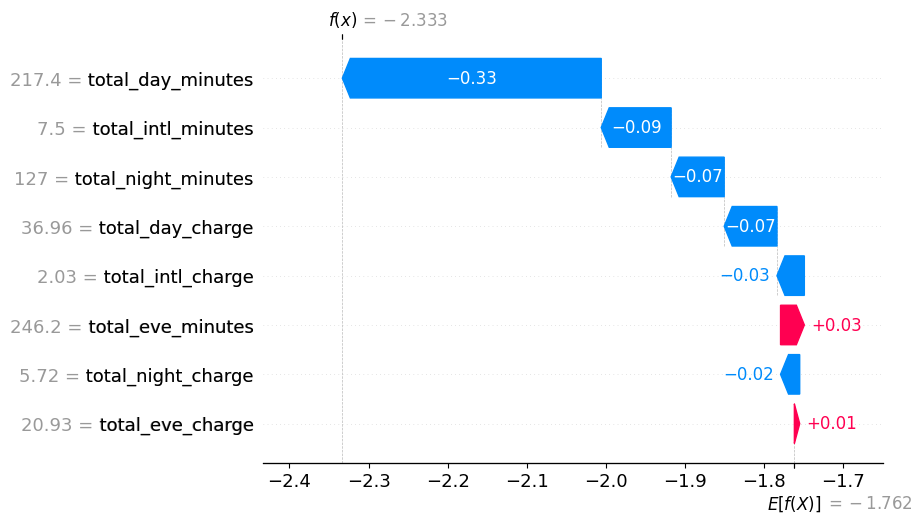

In [19]:
def make_shap_shap():
    explainer = shap.Explainer(model_rf)
    shap_values = explainer(x_s)

    for obs_id in range(2):
        print(f'Observation: {obs_id}')
        shap.plots.waterfall(shap_values[obs_id])

make_shap_shap()

In [35]:
# Task 4: observations 3 and 10
# Task 5: observations 3 and 10
def make_plot_tasks_4_5():
    predict_func = lambda m, d: m.predict(d)
    preds = [model_rf.predict_proba(x_test.iloc[[i]])[:, 1].item() for i in [2, 9]]
    [print(f'Probability for observation {i + 1}: {prob}') for i, prob in enumerate(preds)]
    explainer = dx.Explainer(
        model_rf, x_train, y_train, predict_function = predict_func, label = "RF")
    explainer.model_performance()
    shap_attributions = [explainer.predict_parts(
        x_test.iloc[[i]], type = "shap", label=f'Observation {i + 1}') for i in [2, 9]]
    shap_attributions[0].plot(shap_attributions[1::])

make_plot_tasks_4_5()

Probability for observation 1: 0.10076433420181274
Probability for observation 2: 0.18861456215381622
Preparation of a new explainer is initiated

  -> data              : 4000 rows 8 cols
  -> target variable   : Parameter 'y' was a pandas.Series. Converted to a numpy.ndarray.
  -> target variable   : 4000 values
  -> model_class       : xgboost.sklearn.XGBRFClassifier (default)
  -> label             : RF
  -> predict function  : <function make_plot_tasks_4_5.<locals>.<lambda> at 0x28a2ca710> will be used
  -> predict function  : Accepts pandas.DataFrame and numpy.ndarray.
  -> predicted values  : min = 0.0, mean = 0.072, max = 1.0
  -> model type        : classification will be used (default)
  -> residual function : difference between y and yhat (default)
  -> residuals         : min = -1.0, mean = 0.0695, max = 1.0
  -> model_info        : package xgboost

A new explainer has been created!


/Users/bartlomiejsobieski/miniforge3/envs/mimuw_xai/lib/python3.10/site-packages/xgboost/core.py:160: UserWarning:

[08:01:53] WARNING: /Users/runner/work/xgboost/xgboost/src/c_api/c_api.cc:1240: Saving into deprecated binary model format, please consider using `json` or `ubj`. Model format will default to JSON in XGBoost 2.2 if not specified.



Observation: 2


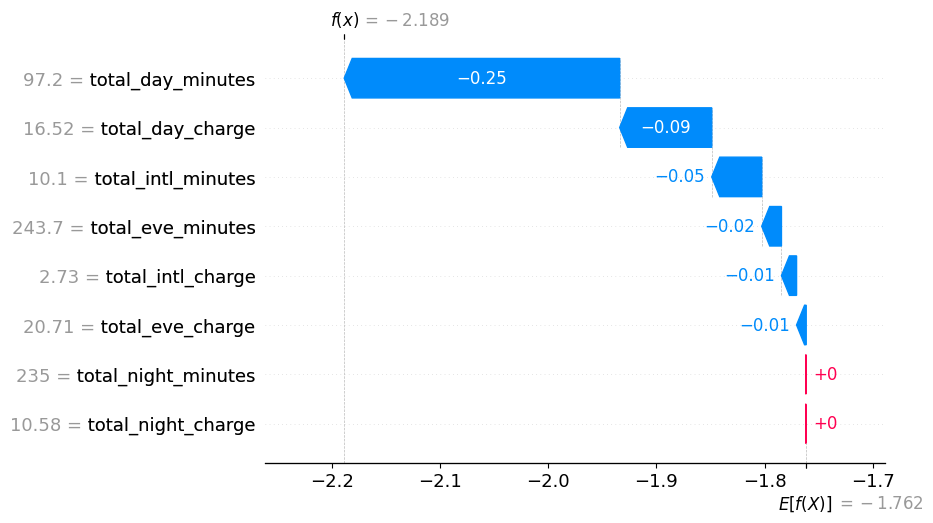

Observation: 9


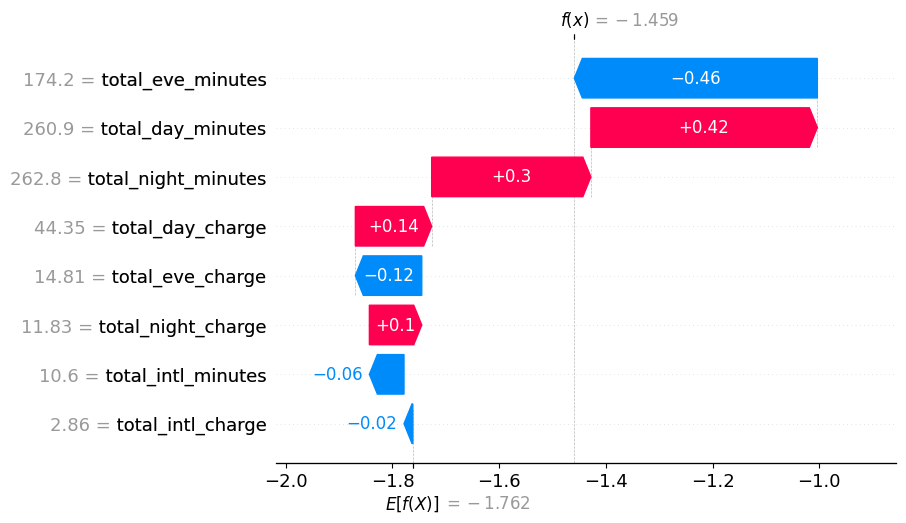

In [21]:
explainer = shap.Explainer(model_rf)
shap_values = explainer(x_test.iloc[[2, 9]])

for obs_num, obs_id in enumerate([2, 9]):
    print(f'Observation: {obs_id}')
    shap.plots.waterfall(shap_values[obs_num])

In [37]:
# Task 7
def make_plot_task_7():
    model_mlp = trained_models['mlp']
    preds = [model_mlp.predict_proba(x_test.iloc[[i]])[:, 1].item() for i in [2, 9]]
    [print(f'Probability for observation {i + 1}: {prob}') for i, prob in enumerate(preds)]
    predict_func = lambda m, d: m.predict_proba(d)[:, 1]
    explainer = dx.Explainer(
        model_mlp, x_train, y_train, predict_function = predict_func, label = "RF")
    explainer.model_performance()
    shap_attributions = [explainer.predict_parts(
        x_test.iloc[[i]], type = "shap", label=f'Observation {i + 1}') for i in [2, 9]]
    shap_attributions[0].plot(shap_attributions[1::])

make_plot_task_7()

Probability for observation 1: 0.08895326872084033
Probability for observation 2: 0.31728696521103766
Preparation of a new explainer is initiated

  -> data              : 4000 rows 8 cols
  -> target variable   : Parameter 'y' was a pandas.Series. Converted to a numpy.ndarray.
  -> target variable   : 4000 values
  -> model_class       : sklearn.neural_network._multilayer_perceptron.MLPClassifier (default)
  -> label             : RF
  -> predict function  : <function make_plot_task_7.<locals>.<lambda> at 0x28a36dd80> will be used
  -> predict function  : Accepts pandas.DataFrame and numpy.ndarray.
  -> predicted values  : min = 0.00876, mean = 0.136, max = 0.99
  -> model type        : classification will be used (default)
  -> residual function : difference between y and yhat (default)
  -> residuals         : min = -0.94, mean = 0.00507, max = 0.982
  -> model_info        : package sklearn

A new explainer has been created!


/Users/bartlomiejsobieski/miniforge3/envs/mimuw_xai/lib/python3.10/site-packages/sklearn/base.py:465: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names

